<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Мы фиксируем сиды в домашках, чтобы проводить какие-либо эксперименты. С помощью сидов у нас случайные процессы будут одинаковыми при каждом запуске кода со всеми вытекающими по типу сравнения моделей, проверки результатов и др.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [5]:
import pandas as pd

In [6]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [7]:
# 30 рандомных строк из трейнового датасета
print("30 рандомных строк из трейна:")
display(df_train.sample(30))

# 5 строк с начала и с конца тестового датасета
print("Первые 5 строк теста:")
display(df_test.head())
print("Последние 5 строк теста:")
display(df_test.tail())

# чек пропусков
print("Пропуски в трейне:")
missing_train = df_train.isnull().sum()
print(missing_train[missing_train > 0])

print("\nПропуски в тесте:")
missing_test = df_test.isnull().sum()
print(missing_test[missing_test > 0])

# чек явных дубликатов
print(f"\nДубликаты в трейне: {df_train.duplicated().sum()}")
print(f"Дубликаты в тесте: {df_test.duplicated().sum()}")

30 рандомных строк из трейна:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


Первые 5 строк теста:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


Последние 5 строк теста:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Пропуски в трейне:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

Пропуски в тесте:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

Дубликаты в трейне: 985
Дубликаты в тесте: 62


### Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Случайные строки показали, насколько представленные данные разнообразны; <br>
Верхние и нижние строки показывают общую структуру датасета; <br>
На основе первых и последних строк нельзя сделать выводы о распределении признаков и выбросах.

### Достаточно ли метода duplicated для анализа дубликатов? Почему?

Нет, ибо он ищет лишь полные дубликаты строк; <br>
Он скипает неполные дубликаты, а также не может задетектить дубликаты с различными опечатками.

In [8]:
# дашборд ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="EDA Cars Dataset", explorative=True)
profile.to_file("eda_report.html")

'''
в общем, не знаю почему, но на ноуте выдает ошибку импорта из библиотеки, на пк все нормально - код работает, но к пк доступа сейчас нет;
и сам дашборд я сделал только для трейна, ибо слишком большой объем
'''

ModuleNotFoundError: No module named 'ydata_profiling'

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
# заполняю пропуски медианами
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()

# трейновые
for col in numeric_cols:
    if df_train[col].isnull().sum() > 0:
        median_val = df_train[col].median()
        df_train[col].fillna(median_val, inplace=True)

# для тестовых юзаю медианы из трейна
for col in numeric_cols:
    if col in df_test.columns and df_test[col].isnull().sum() > 0:
        median_val = df_train[col].median()
        df_test[col].fillna(median_val, inplace=True)

print("Train nulls:", df_train.isnull().sum().sum())
print("Test nulls:", df_test.isnull().sum().sum())

Train nulls: 803
Test nulls: 76


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [10]:
# смотрю, есть ли объекты с одинаковым признаковым описанием
feature_cols = [col for col in df_train.columns if col != 'selling_price']
duplicates = df_train.duplicated(subset=feature_cols, keep=False)
print(f"Кол-во объектов с одинаковыми признаками: {duplicates.sum()}")

# отображаю объекты
if duplicates.sum() > 0:
    duplicate_rows = df_train[duplicates].sort_values(by=feature_cols)
    display(duplicate_rows.head(20))

# удаляю повторяющиеся строки
df_train = df_train.drop_duplicates(subset=feature_cols, keep='first')

# обновляю индексы
df_train = df_train.reset_index(drop=True)

Кол-во объектов с одинаковыми признаками: 1799


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


In [11]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [12]:
# убираю единицы измерения и привожу тип данных к флоату
def clean_numeric_column(series):
    if series.dtype == object:
        return series.str.replace(r'[^\d.]', '', regex=True).replace('', np.nan).astype(float) # тут еще пропуски заменяю, помимо удаления единиц измерения
    return series

# применяю к трейну
df_train['mileage'] = clean_numeric_column(df_train['mileage'])
df_train['engine'] = clean_numeric_column(df_train['engine'])
df_train['max_power'] = clean_numeric_column(df_train['max_power'])

# применяю к тесту
df_test['mileage'] = clean_numeric_column(df_test['mileage'])
df_test['engine'] = clean_numeric_column(df_test['engine'])
df_test['max_power'] = clean_numeric_column(df_test['max_power'])

# удаляю столбец torque
df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

print(f"Train: {df_train.shape}")
print(f"Test: {df_test.shape}")

Train: (5840, 12)
Test: (1000, 12)


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [13]:
# привожу столбцы "engine" и "seats" к инту
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

print("Типы столбцов в трейне:")
print(df_train.dtypes)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [14]:
'''
получается, в столбце "engine" (да и в "seats" тоже) после очистки у нас могли остаться NaN-овые значения, которые невозможно преобразовать в интовые;
из-за этого пришлось вначале заполнить пропуски, а потом уже делать приведение типов
'''

# заполняю пропуски медианами перед преобразованием
if df_train['engine'].isnull().sum() > 0:
    engine_median = df_train['engine'].median()
    df_train['engine'].fillna(engine_median, inplace=True)
    df_test['engine'].fillna(engine_median, inplace=True)

if df_train['seats'].isnull().sum() > 0:
    seats_median = df_train['seats'].median()
    df_train['seats'].fillna(seats_median, inplace=True)
    df_test['seats'].fillna(seats_median, inplace=True)

# преобразую к инту
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

print("\nТипы столбцов в трейне:")
print(df_train[['engine', 'seats']].dtypes)


Типы столбцов в трейне:
engine    int32
seats     int32
dtype: object


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [15]:
# считаю статистики по числовым столбцам
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
print("Статистики по числовым столбцам (трейн):")
display(df_train[numeric_cols].describe())

print("\nСтатистики по числовым столбцам (тест):")
display(df_test[numeric_cols].describe())

# считаю статистики по категориальным столбцам
categorical_cols = df_train.select_dtypes(include=['object']).columns
print("\nСтатистики по категориальным столбцам (трейн):")
display(df_train[categorical_cols].describe())

print("\nСтатистики по категориальным столбцам (тест):")
display(df_test[categorical_cols].describe())

Статистики по числовым столбцам (трейн):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5840.000000,5656.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1429.448973,88.103070,5.426712
std,4.095622,5.354320e+05,6.007114e+04,4.051002,485.662834,32.131943,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000



Статистики по числовым столбцам (тест):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000,1000.00000,981.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1454.87600,91.015627,5.403000
std,4.012149,7.585539e+05,48486.218662,3.989872,521.99574,35.207383,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,83.100000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000



Статистики по категориальным столбцам (трейн):


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603



Статистики по категориальным столбцам (тест):


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


### Сделайте вывод.

В целом, распределенияия числовых признаков в трейне и тес довольно схожи между собой, что дает зеленый свет на дальнейшее обучение модели, ибо обучаться она будет на данных, похожих на тестовые); <br>
Ну и, касательно аномалий или выбросов - их, по крайней мере заметных, не наблюдается.

In [16]:
assert df_train.shape == (5840, 12) # фиксанул тут 13 на 12, потому что ранее удалял столбец "torque"

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [17]:
# юзаю pairplot в трейне для визуализации распределения числовых признаков
numeric_with_target = numeric_cols.tolist() + ['selling_price'] if 'selling_price' in df_train.columns else numeric_cols.tolist()
sns.pairplot(df_train[numeric_with_target])
plt.suptitle("Pairplot трейна")
plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1200x1000 with 0 Axes>

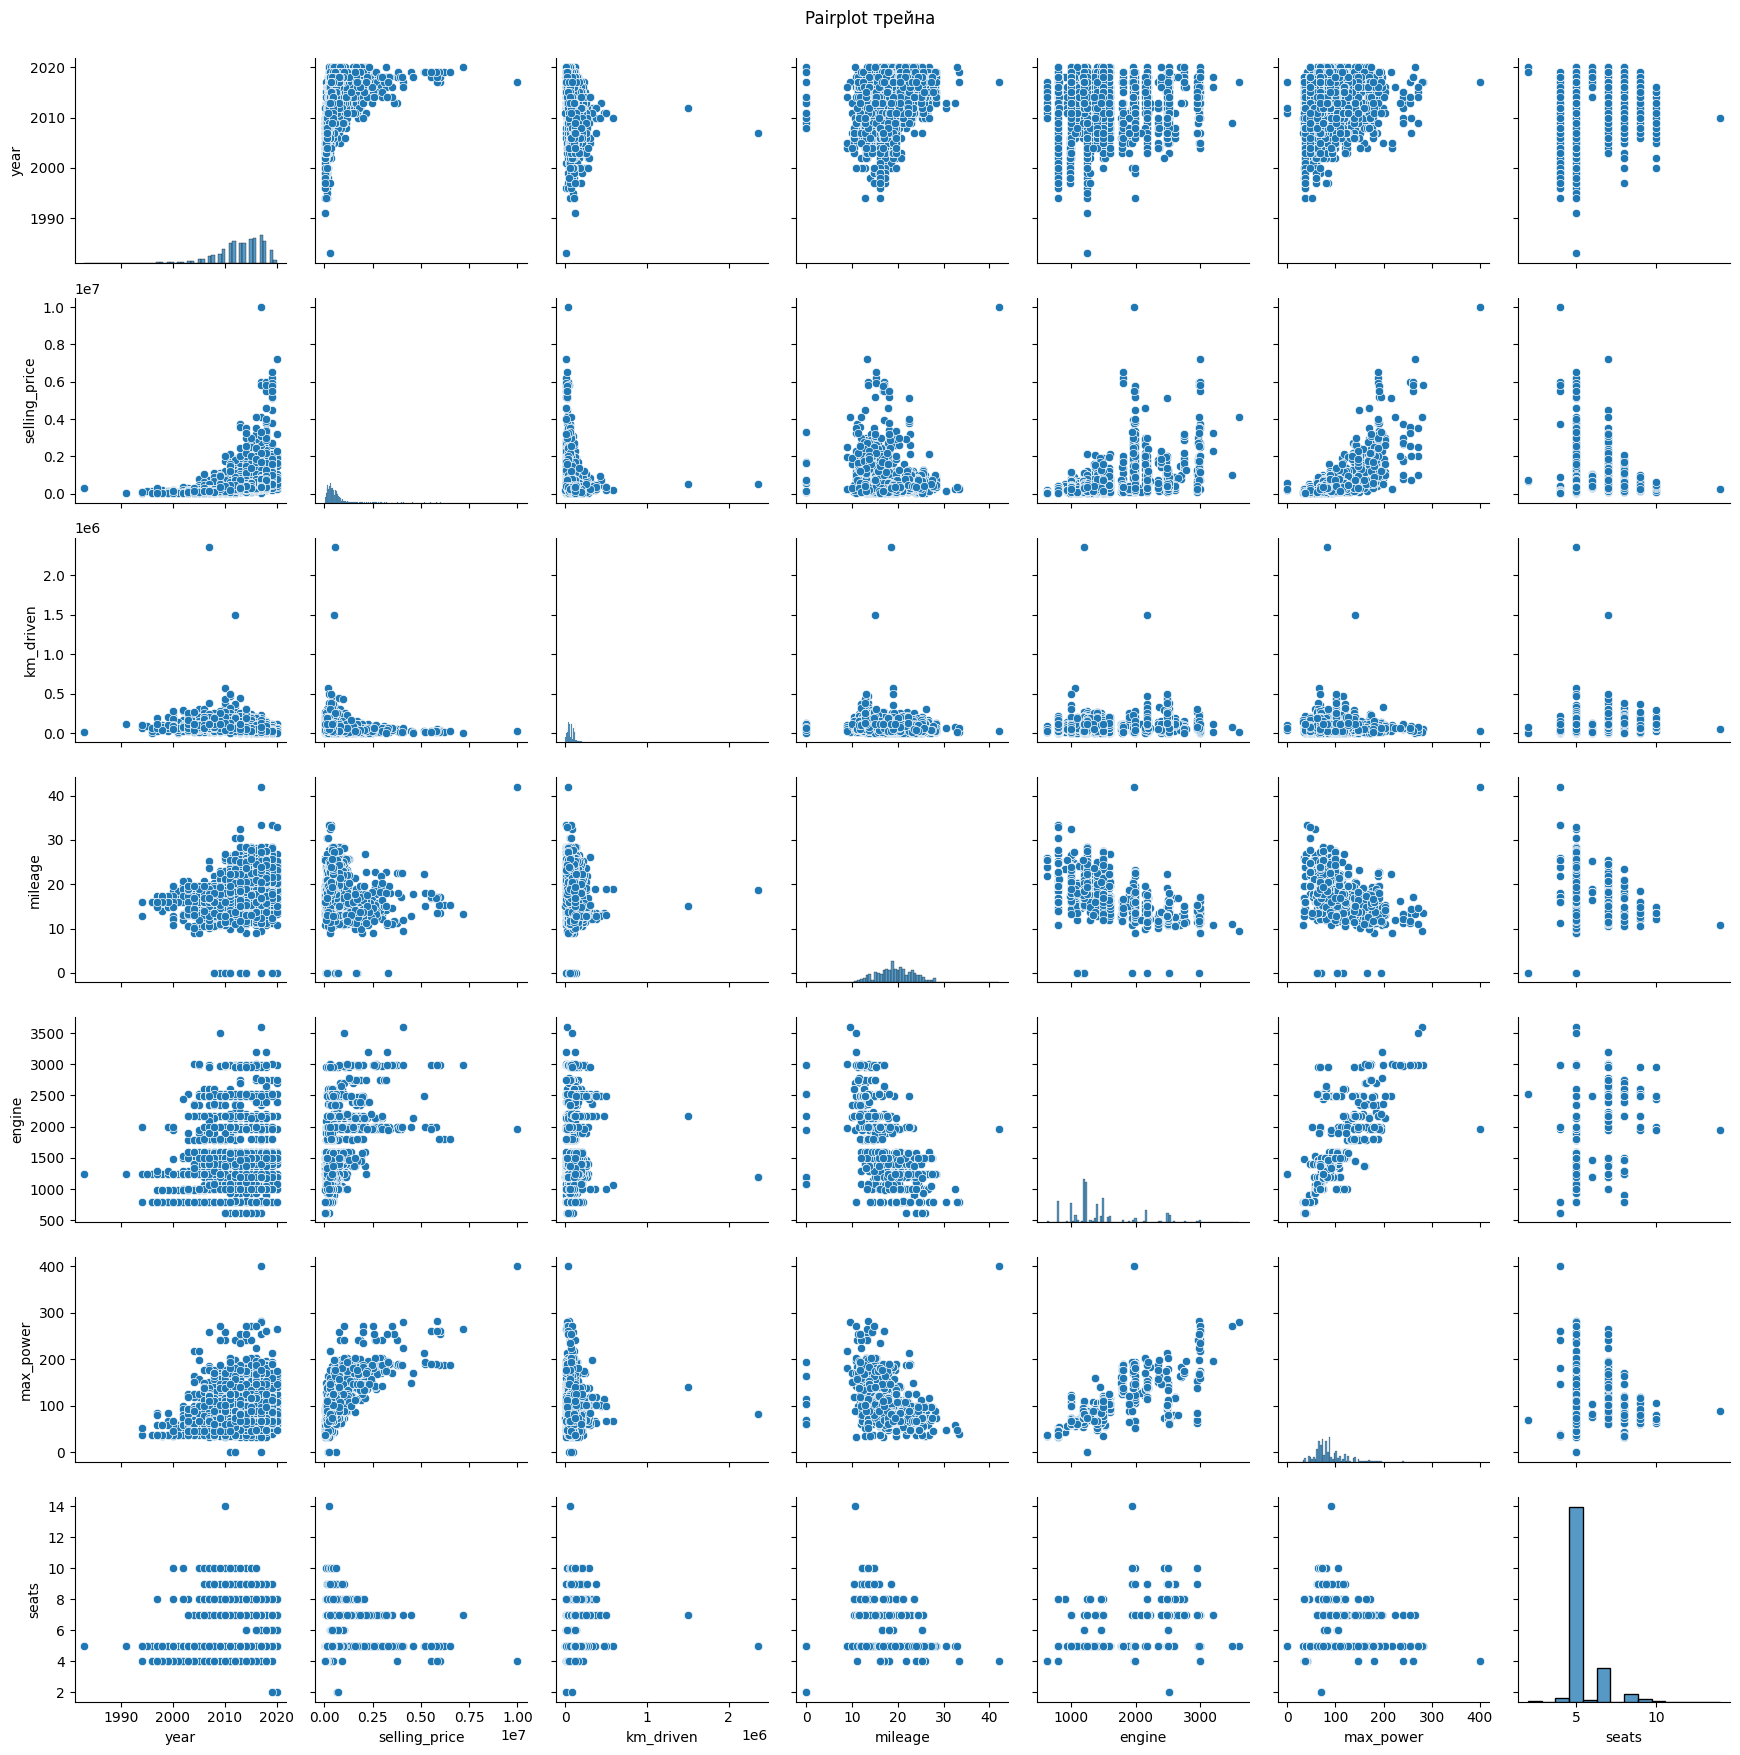

In [18]:
'''
осознал, что numeric_with_target должен быть списком названий столбцов, а не одним столбцом;
из-за этого я решил pairplot-у передавать непосредственно dataframe с нужными колонками
'''
# юзаю pairplot в трейне для визуализации распределения числовых признаков
numeric_cols_for_pairplot = df_train.select_dtypes(include=[np.number]).columns.tolist()

if 'selling_price' in df_train.columns:
    if 'selling_price' not in numeric_cols_for_pairplot:
        numeric_cols_for_pairplot.append('selling_price')

    plt.figure(figsize=(12, 10))
    sns.pairplot(df_train[numeric_cols_for_pairplot])
    plt.suptitle("Pairplot трейна", y = 1)
    plt.tight_layout()
    plt.show()

### Можно ли предположить на основе распределений связь признаков с целевой переменной?

Предположить можно, так как видны положительные связи: year и max_power с ценой, а также отрицательная связь: km_driven с ценой.

### Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Предположить можно, так как видны корреляции между: engine и max_power, а также: year и mileage.

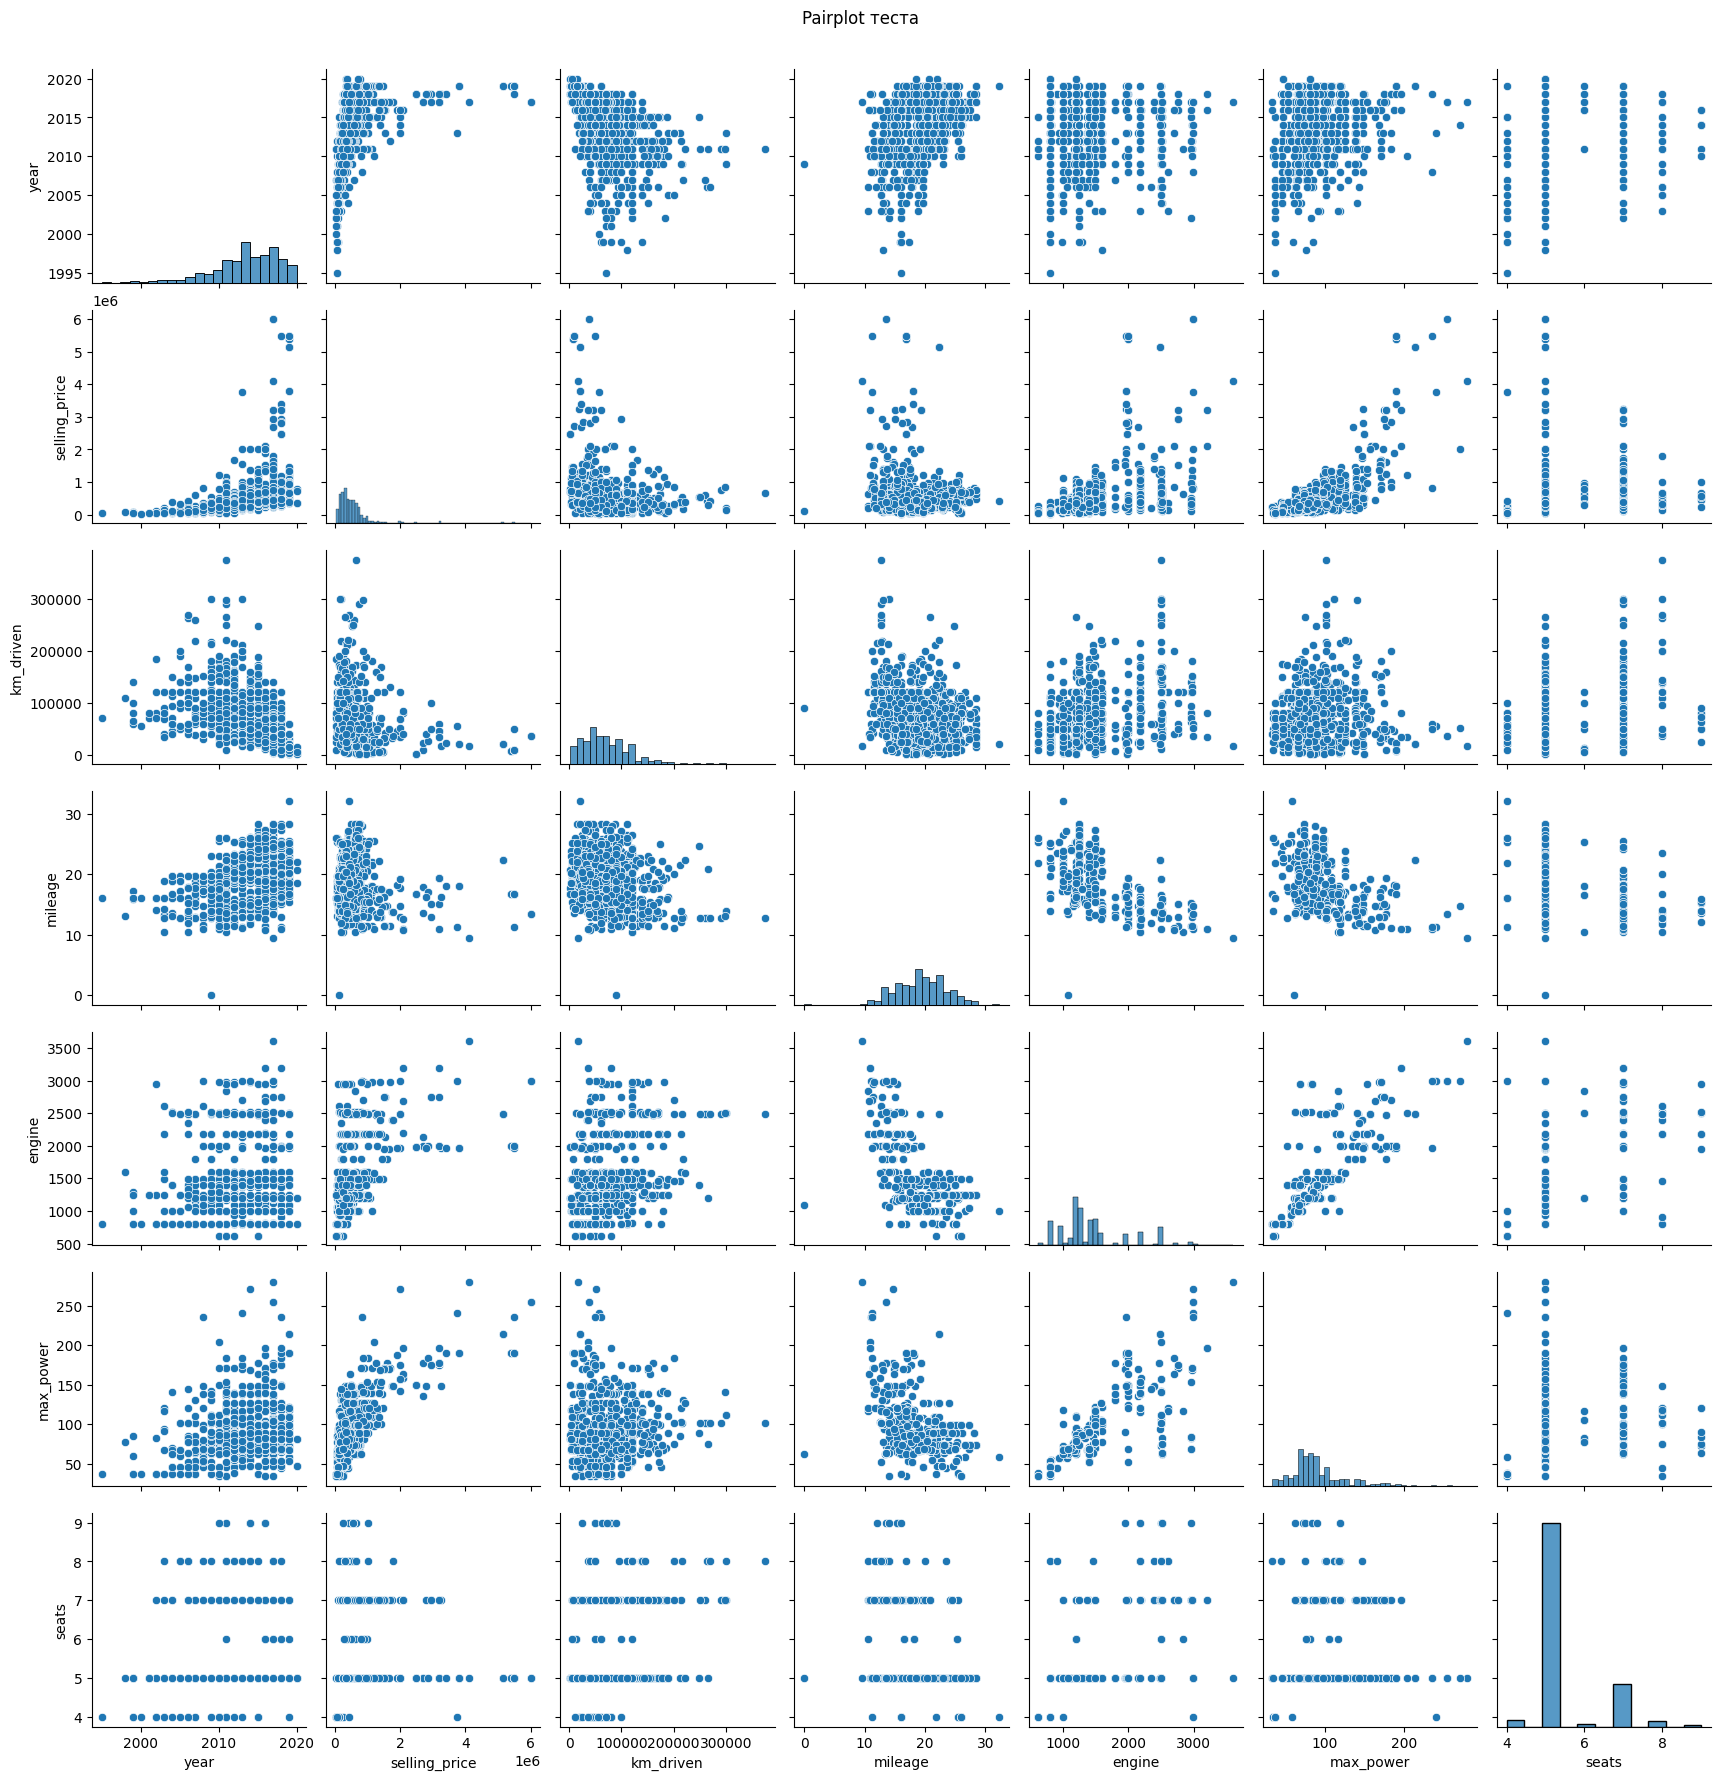

In [19]:
# строю pairplot по тестовым данным
sns.pairplot(df_test[numeric_cols])
plt.suptitle("Pairplot теста", y = 1.02)
plt.show()

### Похожими ли оказались совокупности при разделении на трейн и тест?

Если оценивать чисто визуально, то распределения признаков похожи, нигде нет каких-то сильных смещений или различий в форме распределений.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


Матрица корреляций:


,year,selling_price,km_driven,mileage,engine,max_power,seats,selling_price
year,1.000000,0.427279,-0.368966,0.363360,0.002819,0.157376,0.041178,0.427279
selling_price,0.427279,1.000000,-0.164828,-0.105939,0.447672,0.695593,0.149953,1.000000
km_driven,-0.368966,-0.164828,1.000000,-0.183538,0.229766,0.026676,0.192328,-0.164828
mileage,0.363360,-0.105939,-0.183538,1.000000,-0.574404,-0.374699,-0.452687,-0.105939
engine,0.002819,0.447672,0.229766,-0.574404,1.000000,0.680806,0.652172,0.447672
max_power,0.157376,0.695593,0.026676,-0.374699,0.680806,1.000000,0.242541,0.695593
seats,0.041178,0.149953,0.192328,-0.452687,0.652172,0.242541,1.000000,0.149953
selling_price,0.427279,1.000000,-0.164828,-0.105939,0.447672,0.695593,0.149953,1.000000


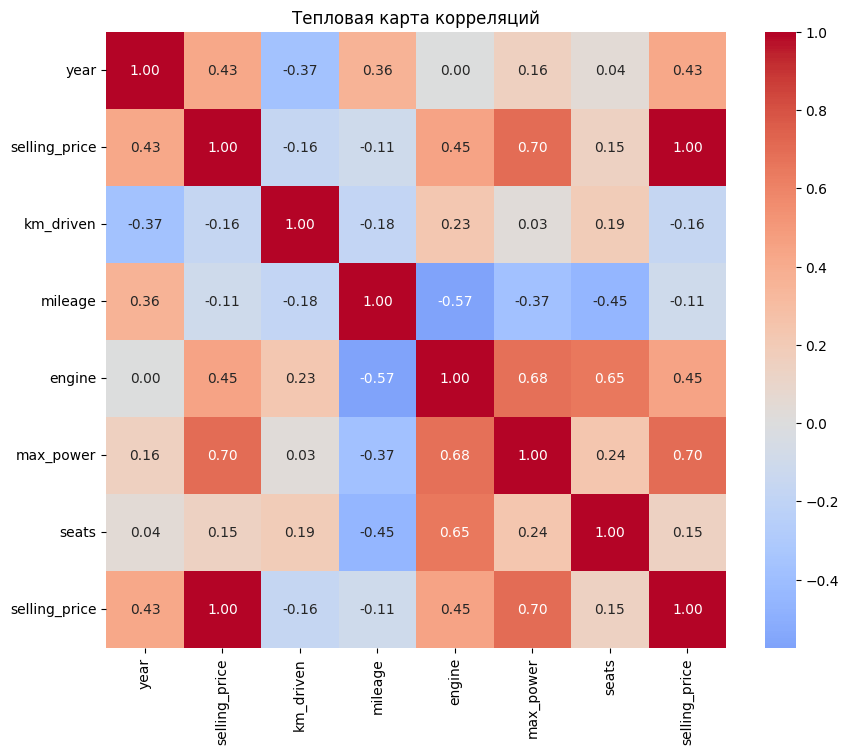

In [20]:
# получаю значения к-та корреляции Пирсона для трейна
corr_matrix = df_train[numeric_with_target].corr()
print("Матрица корреляций:")
display(corr_matrix)

# строю тепловую карту для трейна
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Тепловая карта корреляций")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

### Какие 2 признака наименее скоррелированы между собой?

Между engine и year корреляция вообще отсутствует.

### Между какими наблюдается довольно сильная положительная линейная зависимость?

Самая сильная положительная наблюдается между selling_price и max_power, чуть меньше - между engine и max_power.

### Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Корреляция между пробегом и годом отрицательная, что означает: чем меньше год (т. е. чем старее машина), тем больше будет ее пробег

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

### Boxplot
Можно заюзать Боксплот, чтобы показать, что автомобили с автоматической КПП в среднем стоят дороже, чем автомобили с ручной КПП.

Мне кажется, что эта визуализация важна, поскольку она:
- позволяет сравнить распределение цен между АКПП и механикой;
- показывает медиану и выбросы для каждой группы;
- помогает выявить разницу в ценах между категориями;
- с помощью выбросов можно словить какие-либо особые случаи (ну, к примеру, старинное авто с АКПП).

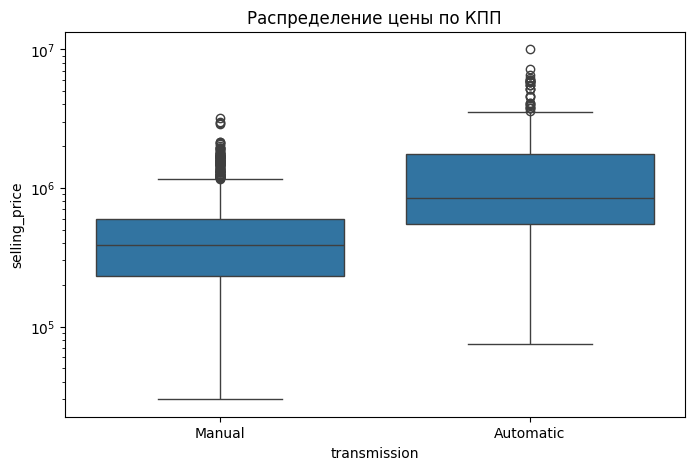

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='selling_price', data=df_train)
plt.title('Распределение цены по КПП')
plt.yscale('log')  # тут поставил лог шкалу для лучшей наглядности
plt.show()

### Scatterplot
Также имеется вайб использовать скаттерплот, чтобы показать зависимость цены от мощности двигателя и типа топлива.

Мне кажется, что эта визуализация важна, поскольку она:
- показывает, что дизельные авто дороже при одинаковой мощности;
- указывает на взаимодействие признаков (мощность и топливо);
- позволяет увидеть, что автомобили с дизельными двигателями стоят дороже, чем с бензиновыми (при прочих равных).

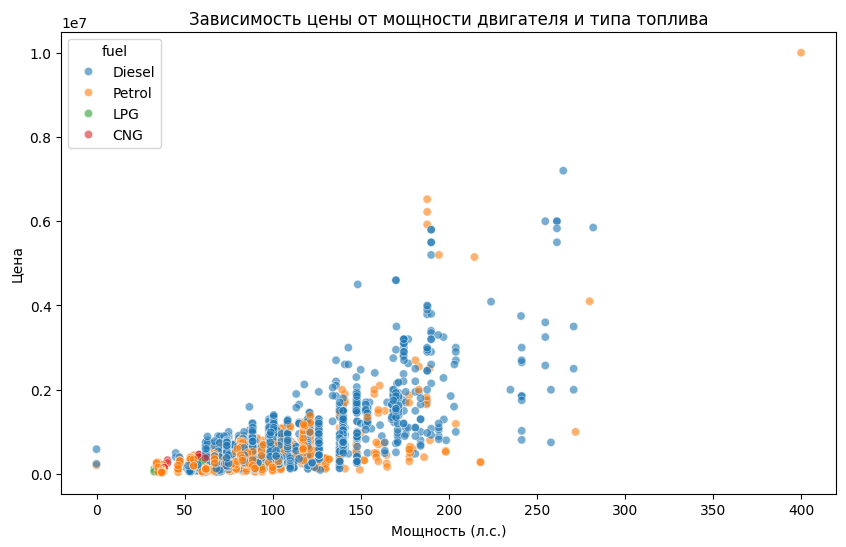

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_power', y='selling_price', hue='fuel', data=df_train, alpha=0.6)
plt.title('Зависимость цены от мощности двигателя и типа топлива')
plt.xlabel('Мощность (л.с.)')
plt.ylabel('Цена')
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [23]:
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

# вещ. признаки
X_train_numeric = df_train.drop(columns=categorical_cols + ['selling_price']).copy()
X_test_numeric = df_test.drop(columns=categorical_cols + ['selling_price']).copy()

# целевая переменная
y_train = df_train['selling_price'].copy()
y_test = df_test['selling_price'].copy()

In [24]:
print("Вещественные признаки:")
print(list(X_train_numeric.columns))
print(f"\nРазмер X_train: {X_train_numeric.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер X_test: {X_test_numeric.shape}")
print(f"Размер y_test: {y_test.shape}")

Вещественные признаки:
['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

Размер X_train: (5840, 6)
Размер y_train: (5840,)
Размер X_test: (1000, 6)
Размер y_test: (1000,)


In [25]:
# проверка на всякий
print("Первые 5 строк X_train_numeric:")
display(X_train_numeric.head())

Первые 5 строк X_train_numeric:


,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
import numpy as np

In [27]:
# создание и обучение модели
lr_model = LinearRegression()
lr_model.fit(X_train_numeric, y_train)

# предикты
y_train_pred = lr_model.predict(X_train_numeric)
y_test_pred = lr_model.predict(X_test_numeric)

# метрики
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [28]:
'''
опять выдает ошибку из-за пропущенных (нановых) значений, поэтому сначала надо проверить и обработать пропуски
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
import numpy as np

In [29]:
if X_train_numeric.isnull().sum().sum() > 0:
    # заполнение пропусков медианами
    for col in X_train_numeric.columns:
        if X_train_numeric[col].isnull().sum() > 0:
            median_val = X_train_numeric[col].median()
            X_train_numeric[col].fillna(median_val, inplace=True)
            # юзаю ту же медиану для теста
            if col in X_test_numeric.columns:
                X_test_numeric[col].fillna(median_val, inplace=True)
    
    print(f"Пропуски в X_train_numeric: {X_train_numeric.isnull().sum().sum()}")
    print(f"Пропуски в X_test_numeric: {X_test_numeric.isnull().sum().sum()}")

Пропуски в X_train_numeric: 0
Пропуски в X_test_numeric: 0


In [30]:
if y_train.isnull().sum() > 0:
    y_train.fillna(y_train.median(), inplace=True)
if y_test.isnull().sum() > 0:
    y_test.fillna(y_train.median(), inplace=True)

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train_numeric, y_train)

# предикты
y_train_pred = lr_model.predict(X_train_numeric)
y_test_pred = lr_model.predict(X_test_numeric)

# метрики
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

In [32]:
print("Модель LinearRegression (без стандартизации):")
print(f"  R² на трейне: {train_r2:.4f}")
print(f"  R² на тесте:  {test_r2:.4f}")
print(f"  MSE на трейне: {train_mse:.2f}")
print(f"  MSE на тесте:  {test_mse:.2f}")
print(f"  RMSE на трейне: {np.sqrt(train_mse):.2f}")
print(f"  RMSE на тесте:  {np.sqrt(test_mse):.2f}")

Модель LinearRegression (без стандартизации):
  R² на трейне: 0.5923
  R² на тесте:  0.5941
  MSE на трейне: 116874153930.03
  MSE на тесте:  233298779730.46
  RMSE на трейне: 341868.62
  RMSE на тесте:  483010.12


In [33]:
print("\nКоэффициенты модели:")
for feature, coef in zip(X_train_numeric.columns, lr_model.coef_):
    print(f"  {feature:15s}: {coef:10.2f}")
print(f"  Intercept: {lr_model.intercept_:.2f}")


Коэффициенты модели:
  year           :   37304.63
  km_driven      :      -0.74
  mileage        :    7234.47
  engine         :     125.98
  max_power      :   10203.25
  seats          :  -23628.30
  Intercept: -75622230.31


### Сделайте выводы по значениям метрик качества.

- R² на трейне и R² на тесте практически одинаковы, что указывает на отсутствие переобучения модели;
- У модели отличная обобщающая способность;
- Средняя ошибка прогноза ~400,000 руб;
- Учитывая диапазон цен автомобилей, это хороший результат.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# проверка стандартизации
print("Проверка стандартизации:")
print(f"Средние значения после стандартизации (трейн): {X_train_scaled.mean(axis=0).round(2)}")
print(f"Стандартные отклонения (трейн): {X_train_scaled.std(axis=0).round(2)}")

Проверка стандартизации:
Средние значения после стандартизации (трейн): [ 0. -0. -0. -0.  0.  0.]
Стандартные отклонения (трейн): [1. 1. 1. 1. 1. 1.]


In [36]:
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)

# предикты
y_train_pred_scaled = lr_model_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_model_scaled.predict(X_test_scaled)

# метрики
train_r2_scaled = r2_score(y_train, y_train_pred_scaled)
test_r2_scaled = r2_score(y_test, y_test_pred_scaled)
train_mse_scaled = MSE(y_train, y_train_pred_scaled)
test_mse_scaled = MSE(y_test, y_test_pred_scaled)

In [37]:
print("\nМодель LinearRegression (со стандартизацией):")
print(f"  R² на трейне: {train_r2_scaled:.4f}")
print(f"  R² на тесте:  {test_r2_scaled:.4f}")
print(f"  MSE на трейне: {train_mse_scaled:.2f}")
print(f"  MSE на тесте:  {test_mse_scaled:.2f}")


Модель LinearRegression (со стандартизацией):
  R² на трейне: 0.5923
  R² на тесте:  0.5941
  MSE на трейне: 116874153930.03
  MSE на тесте:  233298779730.45


In [38]:
print("\nСравнение с моделью без стандартизации:")
print(f"  Изменение R² на тесте: {test_r2_scaled - test_r2:.4f}")
print("  Стандартизация не повлияла на качество, но она важна для интерпретации")


Сравнение с моделью без стандартизации:
  Изменение R² на тесте: 0.0000
  Стандартизация не повлияла на качество, но она важна для интерпретации


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [39]:
print("Коэффициенты модели (стандартизованные признаки):")
coef_df = pd.DataFrame({
    'Признак': X_train_numeric.columns,
    'Коэффициент': lr_model_scaled.coef_,
    'Абс. значение': np.abs(lr_model_scaled.coef_)
}).sort_values('Абс. значение', ascending=False)

display(coef_df)

Коэффициенты модели (стандартизованные признаки):


,Признак,Коэффициент,Абс. значение
4,max_power,322807.353259,322807.353259
0,year,152772.570846,152772.570846
3,engine,61178.494337,61178.494337
1,km_driven,-44158.818520,44158.818520
2,mileage,28833.925778,28833.925778
5,seats,-23209.132486,23209.132486


In [40]:
most_important = coef_df.iloc[0]
print(f"\nСамый важный признак для предсказания цены:")
print(f"  {most_important['Признак']} с коэффициентом {most_important['Коэффициент']:.2f}")


Самый важный признак для предсказания цены:
  max_power с коэффициентом 322807.35


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# предикты
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# метрики
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print("Lasso регрессия (alpha=1.0):")
print(f"  R² на трейне: {train_r2_lasso:.4f}")
print(f"  R² на тесте:  {test_r2_lasso:.4f}")

Lasso регрессия (alpha=1.0):
  R² на трейне: 0.5923
  R² на тесте:  0.5941


In [43]:
print("\nКоэффициенты Lasso модели:")
lasso_coef_df = pd.DataFrame({
    'Признак': X_train_numeric.columns,
    'Коэффициент': lasso_model.coef_
})

zeroed_coefs = lasso_coef_df[lasso_coef_df['Коэффициент'] == 0]
non_zeroed_coefs = lasso_coef_df[lasso_coef_df['Коэффициент'] != 0]

print(f"Зануленных коэффициентов: {len(zeroed_coefs)} из {len(lasso_coef_df)}")
if len(zeroed_coefs) > 0:
    print("Зануленные признаки:")
    for _, row in zeroed_coefs.iterrows():
        print(f"  - {row['Признак']}")

print(f"\nНенулевые коэффициенты ({len(non_zeroed_coefs)}):")
for _, row in non_zeroed_coefs.iterrows():
    print(f"  {row['Признак']:15s}: {row['Коэффициент']:10.2f}")


Коэффициенты Lasso модели:
Зануленных коэффициентов: 0 из 6

Ненулевые коэффициенты (6):
  year           :  152772.39
  km_driven      :  -44157.69
  mileage        :   28832.04
  engine         :   61173.66
  max_power      :  322808.24
  seats          :  -23206.26


### Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

Так как все признаки остались, то alpha=1.0 — слишком малая регуляризация для этих данных; <br>
Нужны большие значения alpha (> 1.0), чтобы увидеть эффект L1-регуляризации.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# GridSearchCV для Lasso
lasso_grid = GridSearchCV(
    Lasso(random_state=42),
    param_grid_lasso,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

# обучение
lasso_grid.fit(X_train_scaled, y_train)

# резы
print("Результаты GridSearchCV для Lasso:")
print(f"Лучшие параметры: {lasso_grid.best_params_}")
print(f"Лучший R² (кросс-валидация): {lasso_grid.best_score_:.4f}")

Результаты GridSearchCV для Lasso:
Лучшие параметры: {'alpha': 100.0}
Лучший R² (кросс-валидация): 0.5682


In [46]:
best_lasso = lasso_grid.best_estimator_
y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)
test_r2_best_lasso = r2_score(y_test, y_test_pred_best_lasso)

print(f"R² на тесте с лучшей моделью: {test_r2_best_lasso:.4f}")

R² на тесте с лучшей моделью: 0.5940


In [47]:
n_folds = 10
n_params = len(param_grid_lasso['alpha'])
total_models_lasso = n_folds * n_params
print(f"\nКоличество обученных моделей: {n_folds} фолдов × {n_params} параметров = {total_models_lasso} моделей")


Количество обученных моделей: 10 фолдов × 6 параметров = 60 моделей


In [48]:
print("\nКоэффициенты лучшей Lasso модели:")
best_lasso_coefs = pd.DataFrame({
    'Признак': X_train_numeric.columns,
    'Коэффициент': best_lasso.coef_
})
best_lasso_coefs['Абс'] = np.abs(best_lasso_coefs['Коэффициент'])
display(best_lasso_coefs.sort_values('Абс', ascending=False))


Коэффициенты лучшей Lasso модели:


,Признак,Коэффициент,Абс
4,max_power,322894.686726,322894.686726
0,year,152748.685937,152748.685937
3,engine,60703.301620,60703.301620
1,km_driven,-44048.629947,44048.629947
2,mileage,28653.866852,28653.866852
5,seats,-22921.970108,22921.970108


In [49]:
zeroed_in_best = best_lasso_coefs[best_lasso_coefs['Коэффициент'] == 0]
print(f"\nЗануленных коэффициентов в лучшей модели: {len(zeroed_in_best)}")
if len(zeroed_in_best) > 0:
    print("Зануленные признаки:")
    for _, row in zeroed_in_best.iterrows():
        print(f"  - {row['Признак']}")


Зануленных коэффициентов в лучшей модели: 0


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# GridSearchCV
elastic_grid = GridSearchCV(
    ElasticNet(random_state=42, max_iter=10000),
    param_grid_elastic,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

# обучение
elastic_grid.fit(X_train_scaled, y_train)

# резы
print("Результаты GridSearchCV для ElasticNet:")
print(f"Лучшие параметры: {elastic_grid.best_params_}")
print(f"Лучший R² (кросс-валидация): {elastic_grid.best_score_:.4f}")

Результаты GridSearchCV для ElasticNet:
Лучшие параметры: {'alpha': 1.0, 'l1_ratio': 0.9}
Лучший R² (кросс-валидация): 0.5761


In [52]:
best_elastic = elastic_grid.best_estimator_
y_test_pred_best_elastic = best_elastic.predict(X_test_scaled)
test_r2_best_elastic = r2_score(y_test, y_test_pred_best_elastic)

print(f"R² на тесте с лучшей ElasticNet моделью: {test_r2_best_elastic:.4f}")

R² на тесте с лучшей ElasticNet моделью: 0.5722


In [53]:
n_folds = 10
n_alpha = len(param_grid_elastic['alpha'])
n_l1_ratio = len(param_grid_elastic['l1_ratio'])
total_models_elastic = n_folds * n_alpha * n_l1_ratio
print(f"\nКоличество обученных моделей: {n_folds} фолдов × {n_alpha} alpha × {n_l1_ratio} l1_ratio = {total_models_elastic} моделей")


Количество обученных моделей: 10 фолдов × 5 alpha × 5 l1_ratio = 250 моделей


In [54]:
comparison_df = pd.DataFrame({
    'Модель': ['LinearRegression', 'LinearRegression (scaled)', 'Lasso (alpha=1.0)', 
               'Lasso (best)', 'ElasticNet (best)'],
    'R² трейн': [train_r2, train_r2_scaled, train_r2_lasso, 
                lasso_grid.best_score_, elastic_grid.best_score_],
    'R² тест': [test_r2, test_r2_scaled, test_r2_lasso,
               test_r2_best_lasso, test_r2_best_elastic]
})

print("Сравнение качества моделей:")
display(comparison_df)

Сравнение качества моделей:


,Модель,R² трейн,R² тест
0,LinearRegression,0.592259,0.594142
1,LinearRegression (scaled),0.592259,0.594142
2,Lasso (alpha=1.0),0.592259,0.594141
3,Lasso (best),0.568224,0.594025
4,ElasticNet (best),0.576131,0.572230


### Сравнение моделей

LinearRegression:
- R² тест: 0.5941;
- Практически нет переобучения (трейн 0.5923, тест 0.5941). 

Стандартизация не влияет на качество:
- LinearRegression и LinearRegression (scaled) дают одинаковый результат.

Lasso с alpha=1.0 почти идентичен обычной регрессии:
- R² тест: 0.594141 vs 0.594142;
- Следовательно, alpha=1.0 слишком слабая регуляризация.

Lasso с оптимальным alpha (лучшая модель):
- Трейн: 0.5682 (из-за регуляризации ниже, чем у обычной регрессии);
- Тест: 0.5940 (практически такое же качество);
- Модель лучше обобщает (меньше переобучения).

ElasticNet показывает худший результат:
- R² тест: 0.5722 (хуже на 0.022 по сравнению с LinearRegression);
- Как вариант, выбранные гиперпараметры не оптимальны.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [55]:
print(f"До удаления: {df_train.shape[1]} столбцов в трейне")
print(f"Уникальных значений в name: {df_train['name'].nunique()}")

# Удаляем столбец name
df_train_cat = df_train.drop(columns=['name']).copy()
df_test_cat = df_test.drop(columns=['name']).copy()

print(f"После удаления: {df_train_cat.shape[1]} столбцов в трейне")
print(f"Столбцы после удаления name: {list(df_train_cat.columns)}")

До удаления: 12 столбцов в трейне
Уникальных значений в name: 1924
После удаления: 11 столбцов в трейне
Столбцы после удаления name: ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [56]:
print(f"Уникальных значений в name: {df_train['name'].nunique()}")
print(f"Примеры значений:\n{df_train['name'].head(10).tolist()}")

Уникальных значений в name: 1924
Примеры значений:
['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition', 'Hyundai i20 Sportz Diesel', 'Maruti Swift VXI BSIII', 'Hyundai Xcent 1.2 VTVT E Plus', 'Maruti Wagon R LXI DUO BSIII', 'Maruti 800 DX BSII', 'Toyota Etios VXD', 'Ford Figo Diesel Celebration Edition', 'Renault Duster 110PS Diesel RxL']


In [57]:
def extract_brand(name):
    """
    извлечение марки автомобиля из строки name
    """
    if pd.isna(name):
        return 'Unknown'
    
    # разделяю по пробелам и юзаю первое слово
    parts = str(name).split()
    if len(parts) > 0:
        brand = parts[0].strip()
        # нормализация некоторых брендов
        brand = brand.replace('-', ' ').title()
        return brand
    return 'Unknown'

In [58]:
df_train['brand'] = df_train['name'].apply(extract_brand)
df_test['brand'] = df_test['name'].apply(extract_brand)

In [59]:
print(f"Уникальных брендов: {df_train['brand'].nunique()}")
print(f"Топ-10 самых популярных брендов:")
print(df_train['brand'].value_counts().head(10))

Уникальных брендов: 30
Топ-10 самых популярных брендов:
brand
Maruti        1804
Hyundai       1058
Mahindra       611
Tata           534
Toyota         309
Ford           308
Honda          308
Chevrolet      188
Renault        171
Volkswagen     153
Name: count, dtype: int64


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [61]:
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

# все ли эти признаки существуют?
available_cat_features = [col for col in categorical_features if col in df_train_cat.columns]
print(f"Категориальные признаки для кодирования: {available_cat_features}")

Категориальные признаки для кодирования: ['fuel', 'seller_type', 'transmission', 'owner', 'seats']


In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), available_cat_features)
    ],
    remainder='passthrough'  # остальные признаки остаются как есть
)

In [63]:
X_train_cat = df_train_cat.drop(columns=['selling_price']).copy()
X_test_cat = df_test_cat.drop(columns=['selling_price']).copy()
y_train_cat = df_train_cat['selling_price'].copy()
y_test_cat = df_test_cat['selling_price'].copy()

# OneHot-кодирование
X_train_encoded = preprocessor.fit_transform(X_train_cat)
X_test_encoded = preprocessor.transform(X_test_cat)

# имена признаков после кодирования
cat_encoder = preprocessor.named_transformers_['cat']
encoded_feature_names = cat_encoder.get_feature_names_out(available_cat_features)

# имена всех признаков (категориальные + числовые)
all_feature_names = list(encoded_feature_names)
# добавляю числовые признаки (которые не были закодированы)
numeric_features = [col for col in X_train_cat.columns if col not in available_cat_features]
all_feature_names.extend(numeric_features)

print(f"  X_train_encoded: {X_train_encoded.shape}")
print(f"  X_test_encoded:  {X_test_encoded.shape}")

  X_train_encoded: (5840, 23)
  X_test_encoded:  (1000, 23)


In [64]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=all_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=all_feature_names)

print("\nПервые 3 строки после кодирования:")
display(X_train_encoded_df.head(3))
print(f"\nВсего признаков после кодирования: {X_train_encoded_df.shape[1]}")


Первые 3 строки после кодирования:


,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seats_7,seats_8,seats_9,seats_10,seats_14,year,km_driven,mileage,engine,max_power
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2014.0,145500.0,23.40,1248.0,74.00
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2014.0,120000.0,21.14,1498.0,103.52
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2010.0,127000.0,23.00,1396.0,90.00



Всего признаков после кодирования: 23


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler as SS

In [66]:
if np.isnan(X_train_encoded).sum() > 0 or np.isnan(X_test_encoded).sum() > 0:
    
    # преобразование в DataFrame для удобства
    X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=all_feature_names)
    X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=all_feature_names)
    
    # заполнение пропуски медианами из трейна
    for col in X_train_encoded_df.columns:
        if X_train_encoded_df[col].isnull().sum() > 0:
            train_median = X_train_encoded_df[col].median()
            X_train_encoded_df[col].fillna(train_median, inplace=True)
            
            # юзаю ту же медиану для теста
            if col in X_test_encoded_df.columns and X_test_encoded_df[col].isnull().sum() > 0:
                X_test_encoded_df[col].fillna(train_median, inplace=True)
    
    # преобразую обратно в numpy массивы
    X_train_encoded = X_train_encoded_df.values
    X_test_encoded = X_test_encoded_df.values

In [67]:
if y_train_cat.isnull().sum() > 0:
    y_train_median = y_train_cat.median()
    y_train_cat.fillna(y_train_median, inplace=True)

if y_test_cat.isnull().sum() > 0:
    # юзаю медиану из трейна для консистентности
    y_train_median = y_train_cat.median()
    y_test_cat.fillna(y_train_median, inplace=True)

In [68]:
scaler_cat = SS()

X_train_encoded_scaled = scaler_cat.fit_transform(X_train_encoded)
X_test_encoded_scaled = scaler_cat.transform(X_test_encoded)

print(f"   Размерность после стандартизации:")
print(f"   X_train_encoded_scaled: {X_train_encoded_scaled.shape}")
print(f"   X_test_encoded_scaled:  {X_test_encoded_scaled.shape}")

   Размерность после стандартизации:
   X_train_encoded_scaled: (5840, 23)
   X_test_encoded_scaled:  (1000, 23)


In [69]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
}

ridge_grid = GridSearchCV(
    Ridge(random_state=42, max_iter=10000),
    param_grid_ridge,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1  # вывод прогресса
)

ridge_grid.fit(X_train_encoded_scaled, y_train_cat)

print(f"   Лучшие параметры: {ridge_grid.best_params_}")
print(f"   Лучший R² (кросс-валидация): {ridge_grid.best_score_:.4f}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
   Лучшие параметры: {'alpha': 1000.0}
   Лучший R² (кросс-валидация): 0.6208


In [70]:
best_ridge = ridge_grid.best_estimator_
y_test_pred_ridge = best_ridge.predict(X_test_encoded_scaled)
test_r2_ridge = r2_score(y_test_cat, y_test_pred_ridge)

print(f"   R² на тесте: {test_r2_ridge:.4f}")

   R² на тесте: 0.6029


### Удалось ли улучшить качество прогнозов?

Удалось: у меня до этого наилучший результат выдавала модель ElasticNet (0.5722), а Ridge с категориальными признаками выдает 0.6029; <br>
Насколько я могу судить, 3% абсолютного улучшения и 5.4% относительного - очень неплохо в рамках задачи регрессии.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [71]:
def business_metric(y_true, y_pred, threshold=0.1):
    """
    Доля прогнозов, отличающихся от реальных цен не более чем на threshold*100%
    
    Parameters:
    -----------
    y_true : array-like
        Истинные значения
    y_pred : array-like
        Предсказанные значения
    threshold : float, default=0.1
        Порог относительной ошибки (10% по умолчанию)
    
    Returns:
    --------
    float : доля прогнозов в пределах threshold
    """
    # считаю относительные ошибки
    relative_errors = np.abs((y_true - y_pred) / y_true)
    
    # сколько прогнозов в пределах порога?
    within_threshold = np.sum(relative_errors <= threshold)
    
    # доля трушных прогнозов
    accuracy = within_threshold / len(y_true)
    
    return accuracy

In [72]:
models_predictions = {
    'LinearRegression (без категорий)': y_test_pred,
    'LinearRegression (стандартизация)': y_test_pred_scaled,
    'Lasso (alpha=1.0)': y_test_pred_lasso,
    'Lasso (best alpha=0.001)': y_test_pred_best_lasso,
    'ElasticNet (best)': y_test_pred_best_elastic,
    'Ridge с категориями (best)': y_test_pred_ridge
}

In [73]:
business_results = []
for model_name, predictions in models_predictions.items():
    accuracy = business_metric(y_test.values, predictions)
    business_results.append((model_name, accuracy))
    
    print(f"{model_name:35s}: {accuracy:.3f} ({accuracy*100:.1f}%)")

LinearRegression (без категорий)   : 0.227 (22.7%)
LinearRegression (стандартизация)  : 0.227 (22.7%)
Lasso (alpha=1.0)                  : 0.227 (22.7%)
Lasso (best alpha=0.001)           : 0.226 (22.6%)
ElasticNet (best)                  : 0.241 (24.1%)
Ridge с категориями (best)         : 0.269 (26.9%)


In [74]:
business_df = pd.DataFrame(business_results, columns=['Модель', 'Business Accuracy'])
business_df = business_df.sort_values('Business Accuracy', ascending=False)

print("\nРейтинг моделей по бизнес-метрике:")
display(business_df)


Рейтинг моделей по бизнес-метрике:


,Модель,Business Accuracy
5,Ridge с категориями (best),0.269
4,ElasticNet (best),0.241
0,LinearRegression (без категорий),0.227
1,LinearRegression (стандартизация),0.227
2,Lasso (alpha=1.0),0.227
3,Lasso (best alpha=0.001),0.226


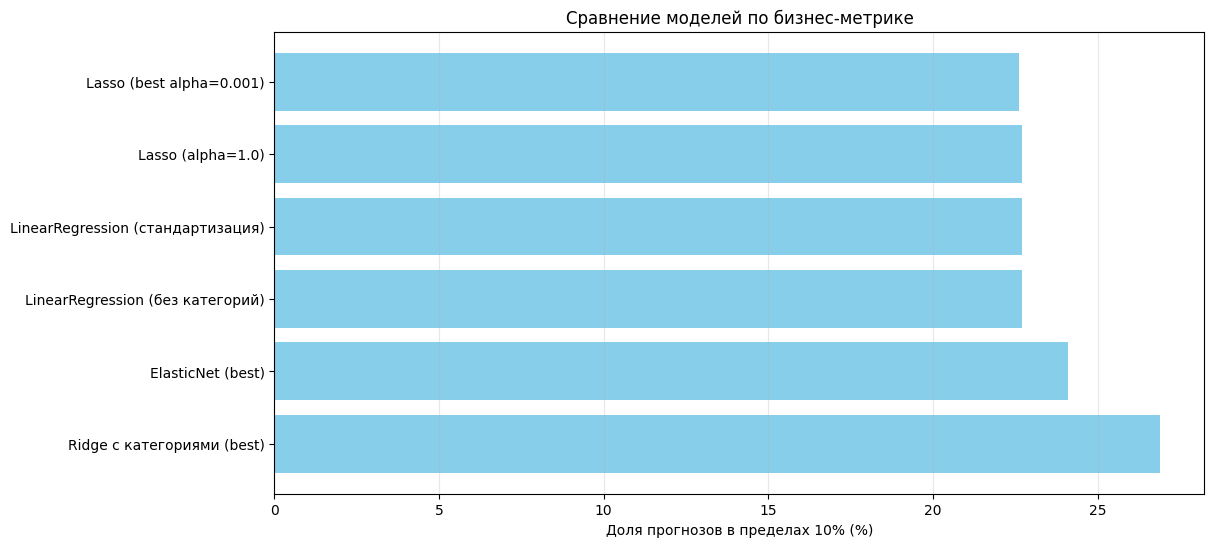

In [75]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(business_df['Модель'], business_df['Business Accuracy'] * 100, color='skyblue')
ax.set_xlabel('Доля прогнозов в пределах 10% (%)')
ax.set_title('Сравнение моделей по бизнес-метрике')
ax.grid(axis='x', alpha=0.3)

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [76]:
import pickle
import os

PROJECT_MODEL_PATH = r"C:\Users\Overwhite\car_price_app\model"
os.makedirs(PROJECT_MODEL_PATH, exist_ok=True)

print(f"Сохранение модели в папку проекта: {PROJECT_MODEL_PATH}")

# сохранение лучшей модели
model_to_save = best_ridge
model_path = os.path.join(PROJECT_MODEL_PATH, 'trained_model.pkl')

with open(model_path, 'wb') as f:
    pickle.dump(model_to_save, f)

# сохранение скейлера
scaler_to_save = scaler_cat
scaler_path = os.path.join(PROJECT_MODEL_PATH, 'scaler.pkl')

with open(scaler_path, 'wb') as f:
    pickle.dump(scaler_to_save, f)

# сохранение препроцессора
preprocessor_to_save = preprocessor
preprocessor_path = os.path.join(PROJECT_MODEL_PATH, 'preprocessor.pkl')

with open(preprocessor_path, 'wb') as f:
    pickle.dump(preprocessor_to_save, f)

# сохранение feature_info
feature_info = {
    'numeric_features': numeric_features,
    'categorical_features': available_cat_features,
    'all_feature_names': all_feature_names,
    'target_column': 'selling_price'
}
    
feature_info_path = os.path.join(PROJECT_MODEL_PATH, 'feature_info.pkl')
    
with open(feature_info_path, 'wb') as f:
        pickle.dump(feature_info, f)

Сохранение модели в папку проекта: C:\Users\Overwhite\car_price_app\model


# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

In [77]:
import pickle
import joblib

print("Создание единого pickle-файла со всей моделью...")

# собираю всё в один словарь
model_package = {
    'model': best_ridge,
    'scaler': scaler_cat,
    'preprocessor': preprocessor,
    'feature_info': {
        'numeric_features': numeric_features,
        'categorical_features': available_cat_features,
        'all_feature_names': all_feature_names,
        'target_column': 'selling_price'
    },
    'metadata': {
        'model_type': 'Ridge',
        'alpha': 1000.0,
        'r2_score': 0.6029,
        'author': 'Козлов Вадим',
        'date': '2025-12-05'
    }
}

# сейв как единый файл
with open('model.pickle', 'wb') as f:
    pickle.dump(model_package, f)

print("Единый pickle-файл создан: model.pickle")

# чек размера
import os
size_mb = os.path.getsize('model.pickle') / (1024 * 1024)
print(f"Размер файла: {size_mb:.2f} MB")

Создание единого pickle-файла со всей моделью...
Единый pickle-файл создан: model.pickle
Размер файла: 0.00 MB
